### Outline

- [Necessary Packages](#necessary_packages)
- [Perceptron](#perceptron)
    - [The Perceptron implementation](#perceptron_implementation)
    - [Test The Perceptron](#test_perceptron)
    - [Generate non-linearly separale dataset](#generate_nls_ds)
    - [Train The Perceptron](#train_the_perceptron)
    - [Plot the datapoints and the generated model](#plot)
    - [Evaluation](#evaluation)
    - [Linearly separable dataset](#ls_ds)
- [Adaline](#adaline)
    - [The Implementation](#implementation)
    - [Traning](#traning)
    - [Plot the datapoints and the decision boundary](#adaline_plot)
    - [Evaluation](#adaline_evaluation)
    - [Linear Case](#adaline_linear_case)
- [Conclusion](#conclusion)

<div id="necessary_packages" >
    <h3>Necessary Packages</h3>
</div>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

<div id="#perceptron" >
    <h2>Perceptron</h2>
</div>

<div id="perceptron_implementation" >
    <h3>The Perceptron implementation</h3>
</div>

In [2]:
class Perceptron:

  def __init__(self, learning_rate : float = 0.01,n_iter : int = 100,w:np.ndarray = None,b:float = None):
    self.learning_rate = learning_rate
    self.n_iter = n_iter
    self.w = w
    self.b = b

  def fit(self, X: np.ndarray, Y: np.ndarray):

    m,n = X.shape

    if self.w is None:
      self.w = np.zeros(n)

    if self.b is None:
      self.b = np.array(0.0)

    for _ in range(self.n_iter):
      for x,y in zip(X, Y):
        error = y - np.where(self.w.T @ x + self.b > 0,1,0)
        self.w = self.w + self.learning_rate * error * x
        self.b = self.b + self.learning_rate * error

    return self

  def predict(self, X):
    return np.where(self.w @ X.T + self.b > 0,1,0)

<div id="test_perceptron" >
    <h3>Test the perceptron</h3>
</div>

In [3]:
model = Perceptron(n_iter=1,learning_rate=0.1,b=0.5)

In [4]:
X = np.array([
    [3,2,1],
    [1,1,1],
    [1,2,3]
])

In [5]:
Y = np.array([0,1,1])

In [6]:
model.fit(X, Y)

In [7]:
(model.w, model.b)

(array([-0.2, -0.1,  0. ]), 0.5)

<div id="generate_nls_ds" >
    <h3>Generate a random non-linearly separable dataset</h3>
</div>

In [8]:
def generate_dataset(m=400):

  X = np.random.normal(loc=0, scale=1, size=(m,2))
  y = (((X[:,0] >= 0) & (X[:,1] >= 0)) | ((X[:,0] <= 0) & (X[:,1] <= 0))).astype(np.int64)
  X += np.random.normal(loc=0, scale=0.0005, size=(m, 2))

  return X,y

In [9]:
X_nl, y_nl = generate_dataset()

<Axes: >

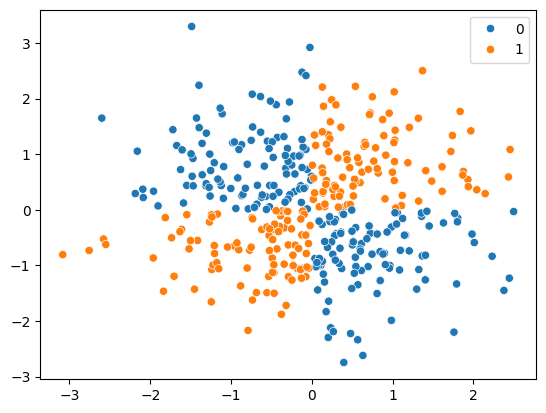

In [14]:
sns.scatterplot(x=X_nl[:,0],y=X_nl[:,1],hue=y_nl)

<div id="train_the_perceptron" >
    <h3>Train the perceptron</h3>
</div>

In [15]:
model = Perceptron(n_iter=10,learning_rate=0.1)

In [16]:
model.fit(X_nl, y_nl)

In [18]:
model.w, model.b

(array([-0.13084248, -0.14122771]), -2.7755575615628914e-17)

<div id="plot" >
    <h3>Plot the datapoints and the generated model</h3>
</div>

In [19]:
def plot_decision_boundary(model: Perceptron, x1=-2, x2=2, ax=None):
  y1 = (-model.w[0] * x1 - model.b) / (model.w[1])
  y2 = (-model.w[0] * x2 - model.b) / (model.w[1])
  sns.lineplot(x=[x1,x2],y=[y1,y2], color='r',ax=ax)

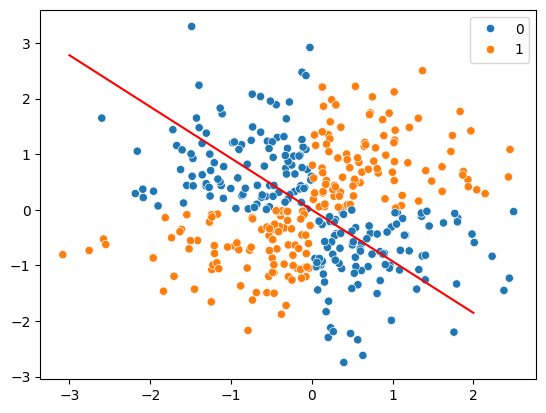

In [21]:
ax = sns.scatterplot(x=X_nl[:,0],y=X_nl[:,1],hue=y_nl)
plot_decision_boundary(model, x1=-3,x2=2,ax=ax)

<div id="evaluation" >
    <h3>Evaluation</h3>
</div>

In [22]:
y_hat = model.predict(X_nl)

In [24]:
print(f"accuracy = {accuracy_score(y_hat,y_nl)}")
print(f"f1_score = {f1_score(y_hat,y_nl)}")
print(f"precision = {precision_score(y_hat,y_nl)}")
print(f"recall = {recall_score(y_hat,y_nl)}")

accuracy = 0.485
f1_score = 0.4717948717948718
precision = 0.48677248677248675
recall = 0.4577114427860697


<Axes: >

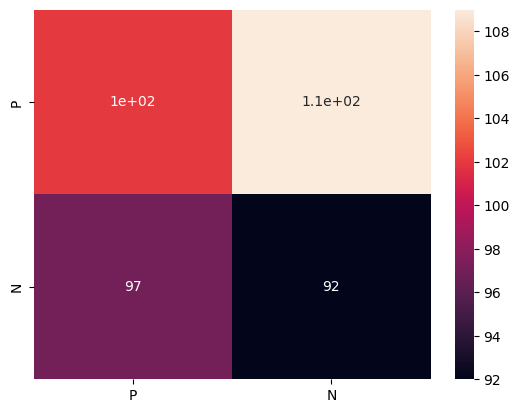

In [28]:
data = pd.DataFrame(data=confusion_matrix(y_nl, y_hat),index=['P','N'],columns=['P','N'])
sns.heatmap(data=data,annot=True)

<div id="ls_ds" >
    <h3>Linearly separable dataset</h3>
</div>

In [32]:
def generate_ls_dataset(m=400):

  X = np.random.normal(loc=0, scale=1, size=(m,2))
  y = (X[:,0] - X[:,1] >= 0).astype(np.int64)
  X += np.random.normal(loc=0, scale=0.3, size=(m, 2))

  return X,y

In [33]:
X, Y = generate_ls_dataset()

In [34]:
model = Perceptron(n_iter=300,learning_rate=0.05)

In [35]:
model.fit(X, Y)

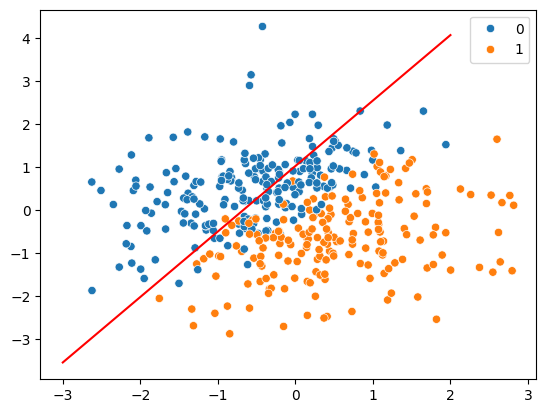

In [37]:
ax = sns.scatterplot(x=X[:,0],y=X[:,1],hue=Y)
plot_decision_boundary(model, x1=-3,x2=2,ax=ax)

In [38]:
y_hat = model.predict(X)

In [40]:
print(f"accuracy = {accuracy_score(y_hat,Y)}")
print(f"f1_score = {f1_score(y_hat,Y)}")
print(f"precision = {precision_score(y_hat,Y)}")
print(f"recall = {recall_score(y_hat,Y)}")

accuracy = 0.7675
f1_score = 0.7982646420824295
precision = 0.9945945945945946
recall = 0.6666666666666666


<Axes: >

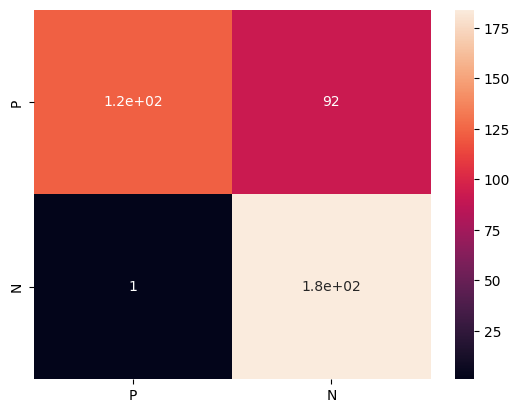

In [41]:
data = pd.DataFrame(data=confusion_matrix(Y, y_hat),index=['P','N'],columns=['P','N'])
sns.heatmap(data=data,annot=True)

<div id="adaline" >
    <h2>Adaline (Adaptive Linear Element)</h2>
</div>

<div id="implementation" >
    <h3>The implementation</h3>
</div>

In [42]:
def linear(x):
    return x

In [43]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [44]:
class Adaline:

    def __init__(self, alpha = 0.001,n_iter = 100,w=None,b=None,activation=linear):
        self.alpha = alpha
        self.n_iter = n_iter
        self.b = b
        self.w = w
        self.activation = activation

    def fit(self, X, Y):

        m,n = X.shape

        if self.b is None:
            self.b = np.array(0.0)

        if self.w is None:
            self.w = np.zeros((n))

        Y = Y.astype(np.float64)
        
        for _ in range(self.n_iter):
            Y_hat = self.activation(self.w @ X.T + self.b)
            for x, y, y_hat in zip(X,Y,Y_hat):
                self.w -= self.alpha * (y_hat - y) * x
                self.b -= self.alpha * (y_hat - y)

        return self

    def predict(self,X):
        return  np.where(self.w @ X.T + self.b > 0,1,0)

<div id="traning" >
    <h3>Training</h3>
</div>

In [45]:
adaline_model = Adaline(alpha=0.1,n_iter=10)

In [46]:
adaline_model.fit(X_nl,y_nl)

In [47]:
adaline_model.w,adaline_model.b

(array([ 1.20076344e+15, -3.79387610e+15]), array(-4.99008154e+15))

<div id="adaline_plot" >
    <h3>Plot the datapoints and the decision boundary</h3>
</div>

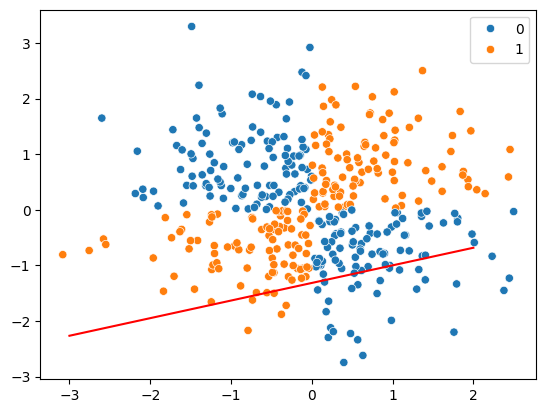

In [48]:
ax = sns.scatterplot(x=X_nl[:,0],y=X_nl[:,1],hue=y_nl)
plot_decision_boundary(adaline_model, x1=-3,x2=2,ax=ax)

<div id="adaline_evaluation" >
    <h3>Evaluation</h3>
</div>

In [49]:
y_hat = model.predict(X_nl)

In [50]:
print(f"accuracy = {accuracy_score(y_hat,y_nl)}")
print(f"f1_score = {f1_score(y_hat,y_nl)}")
print(f"precision = {precision_score(y_hat,y_nl)}")
print(f"recall = {recall_score(y_hat,y_nl)}")

accuracy = 0.6175
f1_score = 0.673773987206823
precision = 0.8359788359788359
recall = 0.5642857142857143


<Axes: >

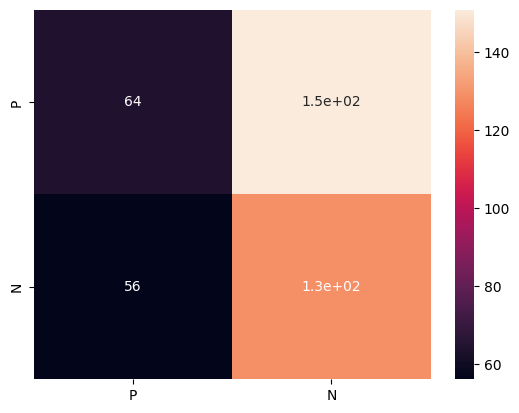

In [52]:
data = pd.DataFrame(data=confusion_matrix(Y, y_hat),index=['P','N'],columns=['P','N'])
sns.heatmap(data=data,annot=True)

<div id="adaline_linear_case" >
    <h3>Linear Case</h3>
</div>

In [53]:
adaline_model = Adaline(alpha=0.01,n_iter=40)

In [55]:
adaline_model.fit(X,Y)

In [56]:
adaline_model.w,adaline_model.b

(array([2.66251405e+20, 4.51144489e+21]), array(-9.02618938e+20))

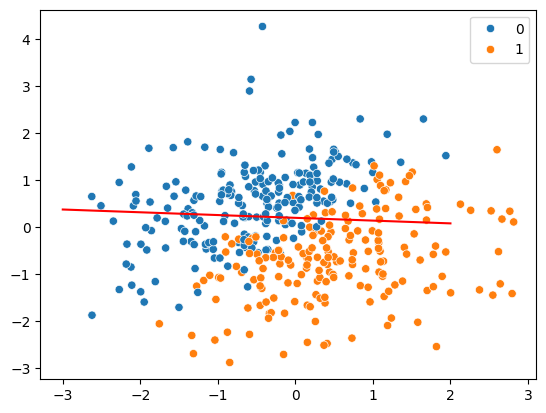

In [57]:
ax = sns.scatterplot(x=X[:,0],y=X[:,1],hue=Y)
plot_decision_boundary(adaline_model, x1=-3,x2=2,ax=ax)

In [58]:
y_hat = adaline_model.predict(X)

In [60]:
print(f"accuracy = {accuracy_score(y_hat,Y)}")
print(f"f1_score = {f1_score(y_hat,Y)}")
print(f"precision = {precision_score(y_hat,Y)}")
print(f"recall = {recall_score(y_hat,Y)}")

accuracy = 0.28
f1_score = 0.19553072625698323
precision = 0.1891891891891892
recall = 0.2023121387283237


<Axes: >

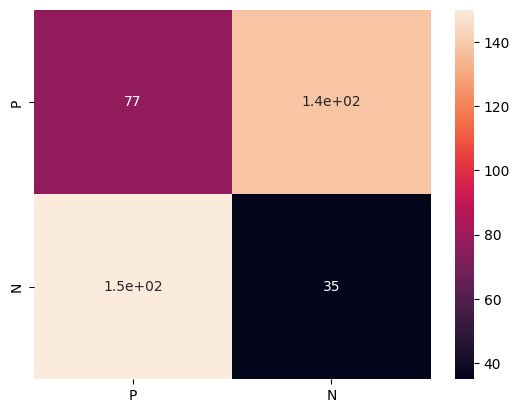

In [61]:
data = pd.DataFrame(data=confusion_matrix(Y, y_hat),index=['P','N'],columns=['P','N'])
sns.heatmap(data=data,annot=True)

<div id="conclusion" >
    <h2>Conclusion</h2>
</div>

- Both models can not learn non-linear relationships.
- Perceptron is more suitable int the linear case.